# Import Libraries and Data

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [10]:
# This command propts matplotlib visuals to appear in the notebook
%matplotlib inline

In [11]:
#Import Data
path = r'C:\Users\Samantha Ramos\Desktop\Restaurant Rating Analysis'

In [12]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'inspections_vis.csv'), index_col = False)

In [27]:
# Import \".json\" file for NYC boros
nyc_geo = r'C:\Users\Samantha Ramos\Desktop\Restaurant Rating Analysis\02 Data\Original Data\nyc json.json'

In [28]:
# That's just in case you want to look at the JSON file contents here too:
f = open(r'C:\Users\Samantha Ramos\Desktop\Restaurant Rating Analysis\02 Data\Original Data\nyc json.json')

# returns JSON object asa dictionary
data = json.load(f)

# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 1, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-74.0505095176639, 40.5664302600169], [-74.0504728251001, 40.5664256132261], [-74.0503046660248, 40.5664256869972], [-74.0501273277124, 40.5664141063267], [-74.04998497929, 40.566404150918], [-74.0493178567004, 40.5658959738316], [-74.049237752256, 40.5653709622315], [-74.0500276557897, 40.5653264068953], [-74.0507455531811, 40.5658953519361], [-74.0507491430285, 40.565962302616], [-74.0507336934298, 40.5660003449344], [-74.0507371641074, 40.5660410003239], [-74.0508047231882, 40.566060426313], [-74.0508747847561, 40.5660894660639], [-74.050907471094, 40.5661025677344], [-74.0509143795066, 40.5661419104295], [-74.0508834575989, 40.5661865163505], [-74.0508539556255, 40.5661977814815], [-74.0508353166446, 40.5662048993806], [-74.0507665272138, 40.5662075521354], [-74.0507097705411, 40.5662023316466], [-74.0506891496123, 40.5662259489233], [-74.0506840054162, 40.5662456231713], [-74.0506840302951, 40.566

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Data Wrangling

In [15]:
df.head()

Unnamed: 0                 NAME       BORO  ZIPCODE CUISINE DESCRIPTION  \
0           0  CROWN FRIED CHICKEN   Brooklyn  11216.0             Chicken   
1           1            BAGEL BOB   Brooklyn  11234.0     Bagels/Pretzels   
2           2               MIZNON  Manhattan  10011.0       Mediterranean   
3           3          I AM KIMCHI     Queens  11358.0              Korean   
4           4      THE MONKEY ROOM  Manhattan  10033.0            American   

  INSPECTION DATE                                           ACTION  \
0        1/3/2023  Violations were cited in the following area(s).   
1        1/3/2023  Violations were cited in the following area(s).   
2        1/3/2023  Violations were cited in the following area(s).   
3        1/3/2023  Violations were cited in the following area(s).   
4        1/3/2023  Violations were cited in the following area(s).   

  VIOLATION CODE                              VIOLATION DESCRIPTION  \
0            10B  Anti-siphonage or back-flow prevention device ...   
1            08A  Establishment is not free of harborage or cond...   
2            10B  Anti-siphonage or back-flow prevention device ...   
3            05D  No hand washing facility in or adjacent to toi...   
4            10F  Non-food contact surface or equipment made of ...   

  CRITICAL FLAG  SCORE GRADE  GRADE DATE RECORD DATE  \
0  Not Critical   29.0     C  2023-01-03    2/5/2024   
1  Not Critical   26.0   NaN         NaN    2/5/2024   
2  Not Critical   12.0     A  2023-01-03    2/5/2024   
3      Critical   26.0   NaN         NaN    2/5/2024   
4  Not Critical    9.0     A  2023-01-03    2/5/2024   

                                 INSPECTION TYPE   Latitude  Longitude  \
0               Cycle Inspection / Re-inspection  40.670640 -73.950440   
1  Pre-permit (Operational) / Initial Inspection  40.618342 -73.932203   
2               Cycle Inspection / Re-inspection  40.741869 -74.004713   
3  Pre-permit (Operational) / Initial Inspection  40.755734 -73.804625   
4          Cycle Inspection / Initial Inspection  40.854623 -73.937051   

  NEW GRADE   CUISINE  
0         C  American  
1         B  American  
2         A  European  
3         B     Asian  
4         A  American

In [16]:
# create a subset
df_nyc = df[['NAME','BORO', 'SCORE']]

In [17]:
df_nyc.head()

NAME       BORO  SCORE
0  CROWN FRIED CHICKEN   Brooklyn   29.0
1            BAGEL BOB   Brooklyn   26.0
2               MIZNON  Manhattan   12.0
3          I AM KIMCHI     Queens   26.0
4      THE MONKEY ROOM  Manhattan    9.0

# Conduct Consistency Checks

#### Missing Values Check

In [18]:
# Check for missing values
df_nyc.isnull().sum()

NAME        0
BORO        0
SCORE    3949
dtype: int64

In [19]:
# remove missing values as they are only 5% of the data
df_nyc_clean = df_nyc[df_nyc['SCORE'].isnull()==False]

In [20]:
df_nyc_clean.isnull().sum()

NAME     0
BORO     0
SCORE    0
dtype: int64

#### Duplicates Check

In [21]:
dups = df_nyc_clean.duplicated()

In [22]:
dups.shape # no dups

(80791,)

#### Extreme Values Check

C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SCORE', ylabel='Count'>

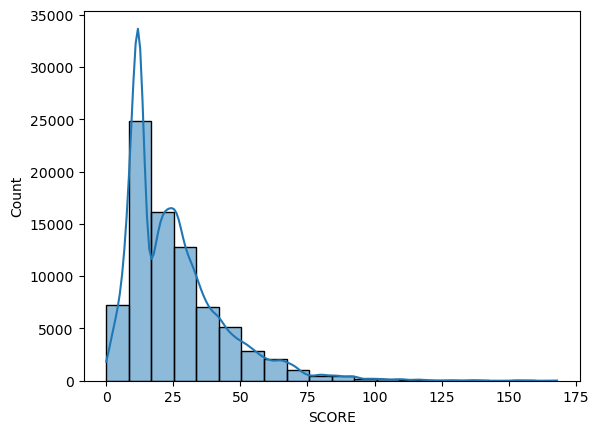

In [23]:
sns.histplot(df_nyc_clean['SCORE'], bins=20, kde = True) # shows extreme values for 'SCORE'

In [24]:
# Clean extreme values in 'SCORE' 
df_nyc_clean = df_nyc_clean[df_nyc_clean['SCORE'] < 75]

# Plot a chloropleth

In [25]:
# Create a data frame with just the boro and the values for rating we want plotted
    
data_to_plot = df_nyc_clean[['BORO','SCORE']]
data_to_plot.head()

BORO  SCORE
0   Brooklyn   29.0
1   Brooklyn   26.0
2  Manhattan   12.0
3     Queens   26.0
4  Manhattan    9.0

In [56]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40.693943, -73.985880], zoom_start = 2.5)
    
# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = nyc_geo, 
    data = data_to_plot,
    columns = ['BORO', 'SCORE'],
    key_on = 'feature.properties.BoroName', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'RdPu', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "inspection score").add_to(map)
folium.LayerControl().add_to(map)
   
map

## The Bronx and Queens have the highest inspection scores of the 5 boros, meaning that they have more violations than Manhattan, Brooklyn, and Staten Island. This is an interesting result given that I discovered that American food tends to get the highest scores and the Bronx and Queens are both very diverse compared to the other boros. This could have been the result of excluding extreme variables that were mostly concentrated in Manhattan.

## My next question would be what are the most common infractions in all boros.